# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [4]:
def x_d(p):
    return 500 - 3.2*p

def x_s(p,t):
    return -100+4.3*(p-t)

In [5]:
p,t=sp.symbols("p t", positive=True, real=True)

equ=sp.Eq(x_d(p),x_s(p,t))
equ

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [109]:
# Likevektspris
p_eq=sp.solve(equ,p)
p_eq[0]

0.573333333333333*t + 80.0

In [108]:
# Likevektskvantum
x_eq=x_s(p_eq[0],t)
x_eq

244.0 - 1.83466666666667*t

In [24]:
p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

print(f"Likevektspris uten avgift: {p_eq_fn(0)}")
print(f"Likevektspris med avgift: {p_eq_fn(4)}")

x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

print(f"Likevektskvantum uten avgift: {x_eq_fn(0)}")
print(f"Likevektskvantum med avgift: {x_eq_fn(4)}")

Likevektspris uten avgift: 80.0
Likevektspris med avgift: 82.29333333333334
Likevektskvantum uten avgift: 244.0
Likevektskvantum med avgift: 236.66133333333332


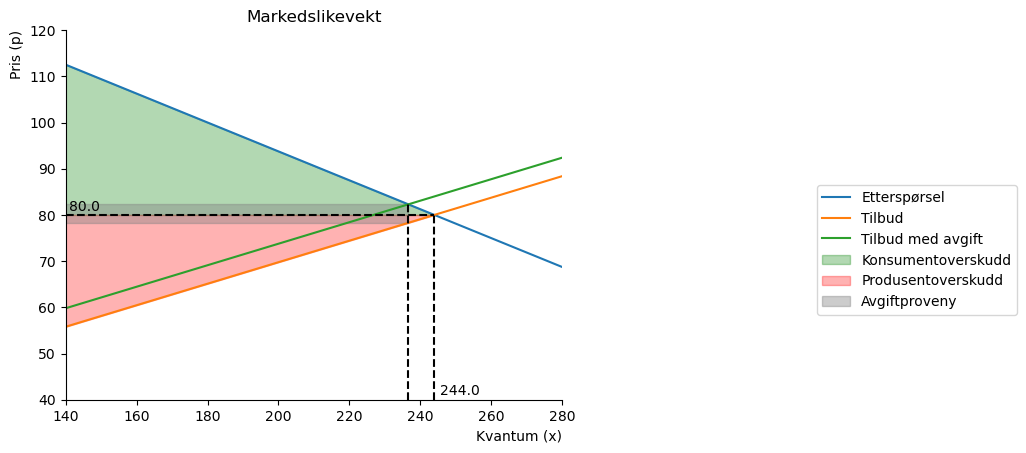

In [189]:
x_num=np.linspace(0,500,100)
q = np.linspace(0,x_eq_fn(0),200)
k = np.linspace(0,x_eq_fn(4),200)

def x_d_invert(p):
    return (500-p)/3.2

def x_s_invert(p,t):
    return ((100+p)/4.3) + t

#lag en akse
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(140,280))
                ax.set(ylim=(40,120))                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen
ax.plot(x_d(x_num), x_num, label='Etterspørsel')
ax.plot(x_s(x_num, 0), x_num, label='Tilbud')
ax.plot(x_s(x_num, 4), x_num, label='Tilbud med avgift')

# tittel
ax.set_title('Markedslikevekt')

ax.vlines(x_eq_fn(0), 40, p_eq_fn(0), linestyles='dashed', color="black")
ax.vlines(x_eq_fn(4), 40, p_eq_fn(4), linestyles='dashed', color="black")
ax.hlines(p_eq_fn(0), 140, x_eq_fn(0), linestyles='dashed', color="black")
ax.hlines(p_eq_fn(4), 140, x_eq_fn(4), linestyles='dashed', color="none")
ax.hlines(p_eq_fn(4)-4, 160, x_eq_fn(4), linestyles='dashed', color="none")
ax.annotate(x_eq_fn(0), xy=(x_eq_fn(0)+1.5,41), annotation_clip=False)
ax.annotate(p_eq_fn(0), xy=(141, p_eq_fn(0)+1), annotation_clip=False)

ax.fill_between(q, 80,x_d_invert(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q, x_s_invert(q, 0),80, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(k,p_eq_fn(4)-4,p_eq_fn(4), color = "gray",alpha = 0.4,label='Avgiftproveny')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [188]:
c_surplus=sp.integrate(x_d(p)-p_eq_fn(4),(p,0,x_eq_fn(0)))
c_surplus_avgift=sp.integrate(x_d(p)-p_eq_fn(4),(p,0,x_eq_fn(4)))

p_surplus=sp.integrate(p_eq_fn(0)-x_s(p, 0),(p,0,x_eq_fn(0)))
p_surplus_avgift=sp.integrate(p_eq_fn(4)-x_s(p, 4),(p,0,x_eq_fn(4)))

In [187]:
from IPython.display import Markdown
tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | {p_eq_fn(0)}    | {round(p_eq_fn(4),2)} | {round(p_eq_fn(4)-p_eq_fn(0),2)}  |
|Produsentpris  |{p_eq_fn(0)} |{round(p_eq_fn(4)-4,2)}   |{round((p_eq_fn(4)-4)-p_eq_fn(0),2)}  |
|Kvantum  | {x_eq_fn(0)} | {round(x_eq_fn(4),2)}  |  {round((x_eq_fn(4))-x_eq_fn(0),2)}  |
| Konsumentoverskudd: | {round(c_surplus,2)} | {round(c_surplus_avgift,2)} |  {round(c_surplus_avgift-c_surplus,2)}   |
| Produsentoverskudd: | {round(p_surplus,2)} | {round(p_surplus_avgift,2)}  | {round(p_surplus_avgift-p_surplus,2)}  |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | 80.0    | 82.29 | 2.29  |
|Produsentpris  |80.0 |78.29   |-1.71  |
|Kvantum  | 244.0 | 236.66  |  -7.34  |
| Konsumentoverskudd: | 6662.83 | 9241.28 |  2578.45   |
| Produsentoverskudd: | -84082.40 | -73206.10  | 10876.30  |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||
